In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

In [3]:
dataset = sklearn.datasets.load_boston()

In [4]:
print(dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

# Data Preprocessing
Mengubah data tersebut ke dalam mode pandas dataframe

In [5]:
# Mengubah data kedalam mode pandas dataframe
dataframe = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [6]:
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# menambah kolom target (price) ke dalam dataframe

dataframe['PRICE'] = dataset.target

In [8]:
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# memeriksa jumlah kolom dan baris
dataframe.shape

(506, 14)

In [10]:
# cek missing values
dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [11]:
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Data Analisis

Memahami korelasi antar feature dalam dataframe
1. Korelasi Positif
2. Korelasi Negatif

In [12]:
korelasi = dataframe.corr()

<AxesSubplot:>

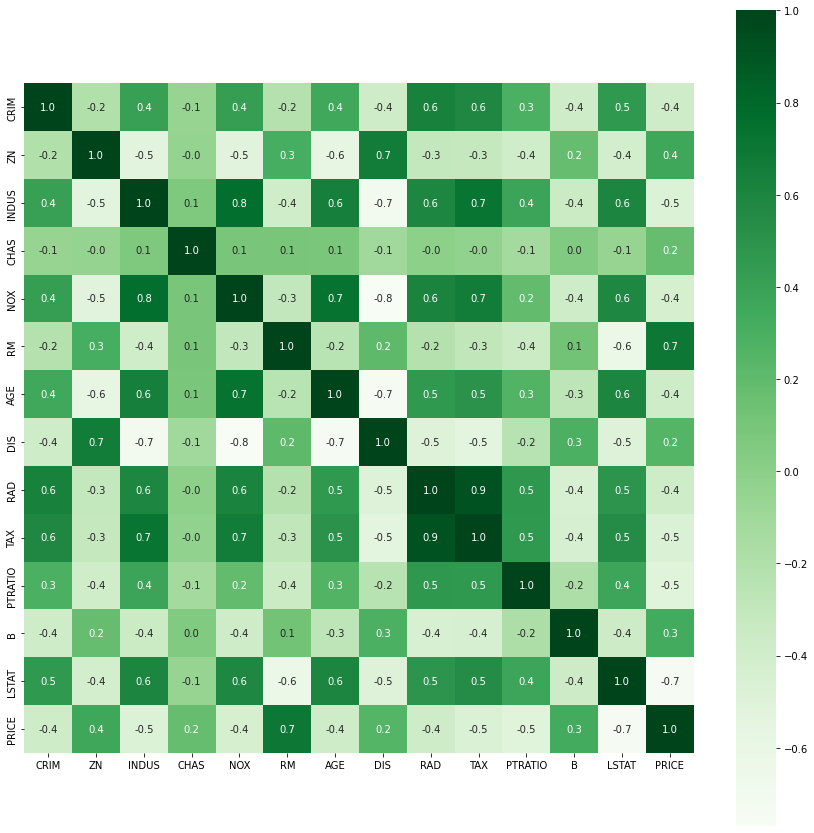

In [13]:
# heatmap untuk memahami korelasi antar feature
plt.figure(figsize=(15,15))
sns.heatmap(korelasi, cbar=True, square=True, annot=True, annot_kws={'size':10}, fmt='.1f', cmap='Greens')

In [14]:
# Splitting, membagi data dan label (X untuk semua data, Y untuk price(label))

X = dataframe.drop(['PRICE'], axis=1)
Y = dataframe['PRICE']

print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [15]:
# Splitting data menjadi DataTraining dan DataTest
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [17]:
print(Y.shape, Y_train.shape, Y_test.shape)

(506,) (404,) (102,)


# Training Model

In [18]:
model = XGBRegressor()

In [19]:
# training model

model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# Evaluation
DataTraining prediction

In [20]:
# melihat tingkat akurasi dari prediksi DataTraining
DataTraining_prediction = model.predict(X_train)

In [21]:
print(DataTraining_prediction)

[23.147501  20.99463   20.090284  34.69053   13.903663  13.510157
 21.998634  15.1940975 10.899711  22.709627  13.832816   5.592794
 29.810236  49.99096   34.89215   20.607384  23.351097  19.23555
 32.695698  19.641418  26.991022   8.401829  46.00729   21.708961
 27.062933  19.321356  19.288303  24.809872  22.61626   31.70493
 18.542515   8.697379  17.395294  23.700663  13.304856  10.492197
 12.688369  25.016556  19.67495   14.902088  24.193798  25.007143
 14.900281  16.995798  15.6009035 12.699232  24.51537   14.999952
 50.00104   17.525454  21.184624  31.998049  15.613355  22.89754
 19.325378  18.717896  23.301125  37.222923  30.09486   33.102703
 21.00072   49.999332  13.405827   5.0280113 16.492886   8.405072
 28.64328   19.499939  20.586452  45.402164  39.79833   33.407326
 19.83506   33.406372  25.271482  50.001534  12.521657  17.457413
 18.61758   22.602625  50.002117  23.801117  23.317268  23.087355
 41.700035  16.119293  31.620516  36.069206   7.0022025 20.3827
 19.996452  11.

Membandingkan 'predictive value' dengan 'original value' menggunakan evaluation metrics. Dalam kasus regresi, kita menggunakan r squared error dan Mean Absolute Error (MAE)

In [22]:
# r squared error (rse)
rse = metrics.r2_score(Y_train, DataTraining_prediction)

# Mean Absolute Error (MAE)
MAE = metrics.mean_absolute_error(Y_train, DataTraining_prediction)

In [23]:
print('r squared error: ', rse)
print('Mean Absolute Error: ', MAE)
print('r squared error dan mean absolute error menunjukkan hasil prediksi yang baik apabila nilainya kurang dari 5 dan 10')

r squared error:  0.9999948236320982
Mean Absolute Error:  0.0145848437110976
r squared error dan mean absolute error menunjukkan hasil prediksi yang baik apabila nilainya kurang dari 5 dan 10


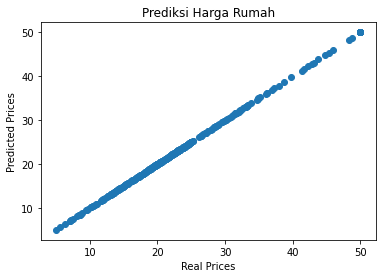

In [24]:
# Visualisasi Y_Train (real prices) vs DataTraining_prediction(predicted prices)
plt.scatter(Y_train, DataTraining_prediction)
plt.xlabel('Real Prices')
plt.ylabel('Predicted Prices')
plt.title('Prediksi Harga Rumah')
plt.show()

In [25]:
#  DataTest Prediction
# melihat tingkat akurasi dari prediksi DataTraining
DataTest_prediction = model.predict(X_test)

In [26]:
print(DataTest_prediction)

[20.288406  20.60247   30.9758    29.910797   8.624953  14.235525
 23.523052  29.730324  31.97293   22.015892  27.946804  24.034412
 20.771402  21.849985  12.024127  22.074675  18.487509  11.052485
  8.141267  15.730722  23.163914  20.233883  35.700928  19.041637
 15.129744  20.228016  47.067314  30.426474  32.729023  17.345776
 17.889462  19.40687   30.769133  25.431686  12.05332   17.900238
 11.031679  21.109531  20.64321   21.982754  25.016281  12.648555
 31.042107   7.106914  18.685764  14.380013  34.902393  16.130005
 32.98537   10.950912  27.335018  29.399937   7.0065055 35.398712
 22.978228  18.582758  19.224293  20.003431  15.341814  22.38517
 19.077105  21.955967  18.91404   32.77595   32.76772   24.36317
 48.262913  23.385014  10.551914  22.664684  14.671612   8.881822
 16.700302  17.221045  26.204681  26.826794  21.590458  21.61216
 19.662537  23.533224  33.25156   17.105299  19.517323  29.344427
 48.885273  35.723255  18.257914  24.461905  27.235567  21.319864
 21.661198  2

In [27]:
# r squared error (rse)
rse = metrics.r2_score(Y_test, DataTest_prediction)

# Mean Absolute Error (MAE)
MAE = metrics.mean_absolute_error(Y_test, DataTest_prediction)

In [28]:
print('r squared error: ', rse)
print('Mean Absolute Error: ', MAE)

r squared error:  0.8711660369151691
Mean Absolute Error:  2.2834744154238233
